# Object Counting on Amazon Bin Image Dataset

## Background

Object recognition is a key component for machine learning domain.

## Datasets: Amazon Bin Image Dataset

### Documentation
- https://github.com/awslabs/open-data-docs/tree/main/docs/aft-vbi-pds

### Download
- https://registry.opendata.aws/amazon-bin-imagery/
- https://github.com/awslabs/open-data-registry/blob/main/datasets/amazon-bin-imagery.yaml

### License

> Creative Commons Attribution-NonCommercial-ShareAlike 3.0 United States (CC BY-NC-SA 3.0 US) https://creativecommons.org/licenses/by-nc-sa/3.0/us/

### Description

This dataset has many images and the corresponding medadata.

> The Amazon Bin Image Dataset contains over 500,000 images and metadata from bins of a pod in an operating Amazon Fulfillment Center. The bin images in this dataset are captured as robot units carry pods as part of normal Amazon Fulfillment Center operations.

### Metadata

Metadata files are JSON files containing `image_fname` and `EXPECTED_QUANTITY` fields that can be useful in this counting capstone project.

In [49]:
!aws s3 cp --no-sign-request s3://aft-vbi-pds/metadata/1.json -
{
    "BIN_FCSKU_DATA": {},
    "EXPECTED_QUANTITY": 0,
    "image_fname": "1.jpg"
}

{
    "BIN_FCSKU_DATA": {},
    "EXPECTED_QUANTITY": 0,
    "image_fname": "1.jpg"
}

{'BIN_FCSKU_DATA': {}, 'EXPECTED_QUANTITY': 0, 'image_fname': '1.jpg'}

Dataset contains 536,434 **JSON** metadata files.

In [ ]:
!aws s3 ls --no-sign-request s3://aft-vbi-pds/metadata/ --summarize > metadatalist

In [55]:
!head -n2 metadatalist

2016-06-21 18:27:38          0 
2017-01-13 15:06:53       2472 00001.json


In [56]:
!tail metadatalist

2017-01-13 17:59:16       4529 99993.json
2017-01-13 17:59:16       4529 99994.json
2017-01-13 17:59:16       3740 99995.json
2017-01-13 17:59:16        864 99996.json
2017-01-13 17:59:16       2132 99997.json
2017-01-13 17:59:16       2770 99998.json
2017-01-13 17:59:16       1658 99999.json

Total Objects: 536435
   Total Size: 1098414519


### Data Size

It's useful to check the datasize to get the idea of data processing cost. The dataset has 536,434 **JPEG** files in total in align with metadata files.

In [ ]:
!aws s3 ls --no-sign-request s3://aft-vbi-pds/bin-images/ --summarize > list

In [52]:
!head -n2 list

2016-06-17 10:28:56          0 
2017-01-13 14:47:53      45769 00001.jpg


In [53]:
!tail list

2017-01-13 18:03:14      80192 99993.jpg
2017-01-13 18:03:14     104201 99994.jpg
2017-01-13 18:03:14     103665 99995.jpg
2017-01-13 18:03:14      58212 99996.jpg
2017-01-13 18:03:14      39300 99997.jpg
2017-01-13 18:03:14      36076 99998.jpg
2017-01-13 18:03:14      35218 99999.jpg

Total Objects: 536435
   Total Size: 30466377489


### File Names

The dataset considers `1.jpg` and `00001.jpg` differently like the following.

```
$ aws s3 ls --no-sign-request s3://aft-vbi-pds/bin-images/1.jpg
2016-06-17 10:30:24      56301 1.jpg

$ aws s3 ls --no-sign-request s3://aft-vbi-pds/bin-images/00001.jpg
2017-01-13 14:47:53      45769 00001.jpg
```

I categorized the files according to the naming scheme.

536,434 images:
- **1~4 digit**: `1.jpg` ~ `1200.jpg`: 1200
- **5-digit**: `00001.jpg` ~ `99999.jpg`: 99,999
- **6-digit**: `100000.jpg` ~ `535234.jpg`: 435,235

## Exploratory Data Analysis

### Group 1 with 1~4 digit in file names

In [26]:
import boto3
from tqdm import tqdm

def download_metadata():
    s3_client = boto3.client('s3')

    directory = 'metadata'
    if not os.path.exists(directory):
        os.makedirs(directory)
    for i in tqdm(range(1, 1201)):
        file_name = "%s.json" % i
        s3_client.download_file('aft-vbi-pds', os.path.join(directory, file_name), os.path.join(directory, file_name))

download_metadata()

100%|██████████| 1200/1200 [01:27<00:00, 13.72it/s]


In [36]:
import json
import pandas as pd

values = []
directory = "metadata"
for i in range(1, 1201):
    filename = "%s/%s.json" % (directory, i)
    with open(filename, "r") as f:
        data = json.load(f)
        n = data['EXPECTED_QUANTITY']
        values.append(n)

df = pd.DataFrame({'n': values})
df

,n
0,0
1,0
2,0
3,0
4,0
...,...
1195,5
1196,5
1197,5
1198,5


In [37]:
df.describe()

,n
count,1200.000000
mean,2.500000
std,1.708537
min,0.000000
25%,1.000000
50%,2.500000
75%,4.000000
max,5.000000


array([[<AxesSubplot:title={'center':'n'}>]], dtype=object)

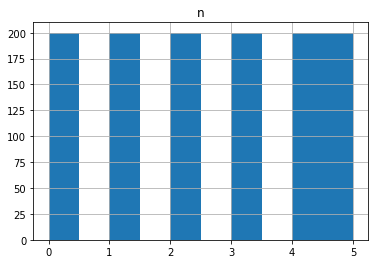

In [38]:
df.hist()

### Group 2 with 5 digits in file name

In [41]:
!df -h .

Filesystem      Size  Used Avail Use% Mounted on
/dev/xvdf       4.9G  643M  4.0G  14% /home/ec2-user/SageMaker


In [ ]:
import boto3
from tqdm import tqdm

def download_metadata():
    s3_client = boto3.client('s3')

    directory = 'metadata'
    if not os.path.exists(directory):
        os.makedirs(directory)
    for i in tqdm(range(1, 100000)):
        file_name = "%05d.json" % i
        s3_client.download_file('aft-vbi-pds', os.path.join(directory, file_name), os.path.join(directory, file_name))

download_metadata()

In [ ]:
import json
import pandas as pd

values = []
directory = "metadata"
for i in range(1, 100000):
    filename = "%s/%05d.json" % (directory, i)
    with open(filename, "r") as f:
        data = json.load(f)
        n = data['EXPECTED_QUANTITY']
        values.append(n)

df = pd.DataFrame({'n': values})
df.to_csv("00001-99999.csv", index=False)

In [44]:
df = pd.read_csv("00001-99999.csv")
df

,n
0,12
1,17
2,16
3,5
4,4
...,...
99994,5
99995,2
99996,16
99997,5


In [45]:
df.describe()

,n
count,99999.000000
mean,5.125321
std,4.758112
min,0.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,209.000000


array([[<AxesSubplot:title={'center':'n'}>]], dtype=object)

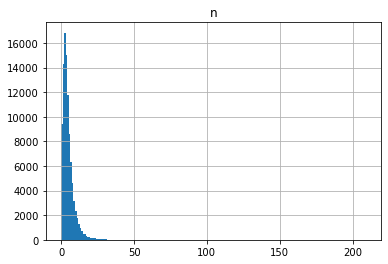

In [46]:
df.hist(bins=200)

### Group with the given file list

In [62]:
import json
with open('file_list.json', 'r') as f:
    d=json.load(f)
for k, v in d.items():
    print("%s has %d items" % (k, len(v)))

1 has 1228 items
2 has 2299 items
3 has 2666 items
4 has 2373 items
5 has 1875 items


### EDA Conclusion
In general, `Group 1` is evenly distributed but the size is too small because it has only 200 images per group. `Group 2` provides more realistic dataset but the distribution is skewed. `Group 3` is too large for now. `file_list.json` has more evenly distributed files. `file_list.json` is a good start to train the baseline model.

- 1~4 digit: 1.jpg ~ 1200.jpg: 1200
- 5-digit: 00001.jpg ~ 99999.jpg: 99,999
- 6-digit: 100000.jpg ~ 535234.jpg: 435,235
- `file_list.json`: 10,441

## Data Preparation (Sampling based on `file_list.json`)

### Split data into train/valid/test = 8:1:1

In [75]:
import json
import random

with open('file_list.json', 'r') as f:
    d=json.load(f)

train = {}
valid = {}
test = {}
for k, v in d.items():
    l = len(v)
    print("%s has %d items" % (k, l))
    random.shuffle(v)
    i = (int)(0.8 * l)
    j = (int)(0.9 * l)
    train[k] = v[:i]
    valid[k] = v[i:j]
    test[k] = v[j:]
    print("%s:%s:%s" % (len(train[k]), len(valid[k]), len(test[k])))
    
with open('train.json', 'w') as f:
    json.dump(train, f)
with open('valid.json', 'w') as f:
    json.dump(valid, f)
with open('test.json', 'w') as f:
    json.dump(test, f)

1 has 1228 items
982:123:123
2 has 2299 items
1839:230:230
3 has 2666 items
2132:267:267
4 has 2373 items
1898:237:238
5 has 1875 items
1500:187:188


### Download data

Downloads training data and arranges it in subfolders. Each of these subfolders contain images where the number of objects is equal to the name of the folder.

```
$ tree .
.
├── test
│   ├── 1
│   ├── 2
│   ├── 3
│   ├── 4
│   └── 5
├── train
│   ├── 1
│   ├── 2
│   ├── 3
│   ├── 4
│   └── 5
└── valid
    ├── 1
    ├── 2
    ├── 3
    ├── 4
    └── 5
```

In [79]:
import os
import json
import boto3
from tqdm import tqdm

def download_and_arrange_data(folder):
    s3_client = boto3.client('s3')

    with open(folder + '.json', 'r') as f:
        d=json.load(f)

    for k, v in d.items():
        print(f"Downloading Images with {k} objects")
        directory=os.path.join(folder, k)
        if not os.path.exists(directory):
            os.makedirs(directory)
        for file_path in tqdm(v):
            file_name=os.path.basename(file_path).split('.')[0]+'.jpg'
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', file_name),
                             os.path.join(directory, file_name))

download_and_arrange_data('train')
#download_and_arrange_data('valid')
#download_and_arrange_data('test')

  0%|          | 0/982 [00:00<?, ?it/s]

  0%|          | 2/1839 [00:00<01:48, 16.98it/s]

  0%|          | 2/2132 [00:00<02:09, 16.44it/s]

  0%|          | 2/1898 [00:00<02:10, 14.55it/s]

  0%|          | 1/1500 [00:00<02:38,  9.48it/s]

100%|██████████| 1500/1500 [01:58<00:00, 12.66it/s]


In [80]:
!ls -al train valid test

test:
total 52
drwxrwxr-x 7 ec2-user ec2-user  4096 Apr 20 23:58 .
drwxrwxr-x 8 ec2-user ec2-user  4096 Apr 21 00:15 ..
drwxrwxr-x 2 ec2-user ec2-user  4096 Apr 20 23:57 1
drwxrwxr-x 2 ec2-user ec2-user 12288 Apr 20 23:57 2
drwxrwxr-x 2 ec2-user ec2-user 12288 Apr 20 23:57 3
drwxrwxr-x 2 ec2-user ec2-user 12288 Apr 20 23:58 4
drwxrwxr-x 2 ec2-user ec2-user  4096 Apr 20 23:58 5

train:
total 284
drwxrwxr-x 7 ec2-user ec2-user  4096 Apr 21 00:12 .
drwxrwxr-x 8 ec2-user ec2-user  4096 Apr 21 00:15 ..
drwxrwxr-x 2 ec2-user ec2-user 36864 Apr 21 00:04 1
drwxrwxr-x 2 ec2-user ec2-user 65536 Apr 21 00:07 2
drwxrwxr-x 2 ec2-user ec2-user 69632 Apr 21 00:10 3
drwxrwxr-x 2 ec2-user ec2-user 69632 Apr 21 00:12 4
drwxrwxr-x 2 ec2-user ec2-user 40960 Apr 21 00:14 5

valid:
total 52
drwxrwxr-x 7 ec2-user ec2-user  4096 Apr 21 00:02 .
drwxrwxr-x 8 ec2-user ec2-user  4096 Apr 21 00:15 ..
drwxrwxr-x 2 ec2-user ec2-user  4096 Apr 20 23:59 1
drwxrwxr-x 2 ec2-user ec2-user 12288 Apr 20 23:59 2
drwxrwxr-x 

In [1]:
!du -h train

112M	train/4
86M	train/5
53M	train/1
107M	train/2
129M	train/3
485M	train


In [2]:
!aws s3 sync train s3://amazonbin/train

In [3]:
!aws s3 sync valid s3://amazonbin/valid

In [4]:
!aws s3 sync test s3://amazonbin/test

upload: test/1/00084.jpg to s3://amazonbin/test/1/00084.jpg                          
upload: test/1/00804.jpg to s3://amazonbin/test/1/00804.jpg                            
upload: test/1/00509.jpg to s3://amazonbin/test/1/00509.jpg                            
upload: test/1/00086.jpg to s3://amazonbin/test/1/00086.jpg                            
upload: test/1/00743.jpg to s3://amazonbin/test/1/00743.jpg                          
upload: test/1/00858.jpg to s3://amazonbin/test/1/00858.jpg                           
upload: test/1/00846.jpg to s3://amazonbin/test/1/00846.jpg                           
upload: test/1/02216.jpg to s3://amazonbin/test/1/02216.jpg                           
upload: test/1/00470.jpg to s3://amazonbin/test/1/00470.jpg                           
upload: test/1/01687.jpg to s3://amazonbin/test/1/01687.jpg                           
upload: test/1/01494.jpg to s3://amazonbin/test/1/01494.jpg                           
upload: test/1/00352.jpg to s3://amazonbin

In [5]:
!aws s3 ls s3://amazonbin/test --recursive --summarize

2022-04-21 01:04:34      72303 test/1/00084.jpg
2022-04-21 01:04:34      65302 test/1/00086.jpg
2022-04-21 01:04:34      66463 test/1/00352.jpg
2022-04-21 01:04:34      75536 test/1/00470.jpg
2022-04-21 01:04:34      28743 test/1/00509.jpg
2022-04-21 01:04:34      75358 test/1/00743.jpg
2022-04-21 01:04:34      30544 test/1/00804.jpg
2022-04-21 01:04:34      87815 test/1/00846.jpg
2022-04-21 01:04:34      66724 test/1/00858.jpg
2022-04-21 01:04:34     103388 test/1/00917.jpg
2022-04-21 01:04:34      41888 test/1/01006.jpg
2022-04-21 01:04:34      29312 test/1/01096.jpg
2022-04-21 01:04:34      38565 test/1/01308.jpg
2022-04-21 01:04:34      54272 test/1/01494.jpg
2022-04-21 01:04:34     118720 test/1/01607.jpg
2022-04-21 01:04:34      37298 test/1/01687.jpg
2022-04-21 01:04:34      43013 test/1/01824.jpg
2022-04-21 01:04:34      15942 test/1/01873.jpg
2022-04-21 01:04:34      32510 test/1/02216.jpg
2022-04-21 01:04:34      47844 test/1/02354.jpg
2022-04-21 01:04:34     130229 test/1/02

## Model Training

In [7]:
import sagemaker
import boto3
import os

from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "amazonbin"
role = sagemaker.get_execution_role()

In [10]:
from sagemaker.pytorch import PyTorch
import os

estimator = PyTorch(
    entry_point="train.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large",
)

In [9]:
estimator.fit({'train': 's3://amazonbin/'})

2022-04-21 01:07:07 Starting - Starting the training job...
2022-04-21 01:07:36 Starting - Preparing the instances for trainingProfilerReport-1650503227: InProgress
.........
2022-04-21 01:08:57 Downloading - Downloading input data.......................................
2022-04-21 01:15:38 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-04-21 01:15:23,942 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-04-21 01:15:23,946 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-04-21 01:15:23,962 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-04-21 01:15:23,969 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-04-21 01:15:24,484 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpu

## Standout Suggestions
You do not need to perform the tasks below to finish your project. However, you can attempt these tasks to turn your project into a more advanced portfolio piece.

In [11]:
from sagemaker.pytorch import PyTorch
import os

hyperparameters = {'batch-size': 256, 'lr': '0.1', 'epochs': '5'}

estimator = PyTorch(
    entry_point="train.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large",
    hyperparameters=hyperparameters,
)

In [ ]:
estimator.fit({'train': 's3://amazonbin/'})

2022-04-21 02:13:49 Starting - Starting the training job...
2022-04-21 02:14:11 Starting - Preparing the instances for trainingProfilerReport-1650507228: InProgress
.........
2022-04-21 02:15:35 Downloading - Downloading input data..................................bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-04-21 02:21:56,962 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-04-21 02:21:56,966 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-04-21 02:21:56,979 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-04-21 02:21:56,986 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-04-21 02:21:57,518 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-04-21 02:21:57,539 sagemaker-training-toolkit INFO     No GPUs detected (no

### Hyperparameter Tuning
**TODO:** Here you can perform hyperparameter tuning to increase the performance of your model. You are encouraged to 
- tune as many hyperparameters as you can to get the best performance from your model
- explain why you chose to tune those particular hyperparameters and the ranges.


In [ ]:
#TODO: Create your hyperparameter search space

In [ ]:
#TODO: Create your training estimator

In [ ]:
# TODO: Fit your estimator

In [ ]:
# TODO: Find the best hyperparameters

### Model Profiling and Debugging
**TODO:** Use model debugging and profiling to better monitor and debug your model training job.

In [ ]:
# TODO: Set up debugging and profiling rules and hooks

In [ ]:
# TODO: Create and fit an estimator

In [ ]:
# TODO: Plot a debugging output.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
# TODO: Display the profiler output

### Model Deploying and Querying
**TODO:** Can you deploy your model to an endpoint and then query that endpoint to get a result?

In [ ]:
# TODO: Deploy your model to an endpoint

In [ ]:
# TODO: Run an prediction on the endpoint

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done

### Cheaper Training and Cost Analysis
**TODO:** Can you perform a cost analysis of your system and then use spot instances to lessen your model training cost?

In [ ]:
# TODO: Cost Analysis

In [ ]:
# TODO: Train your model using a spot instance

### Multi-Instance Training
**TODO:** Can you train your model on multiple instances?

In [ ]:
# TODO: Train your model on Multiple Instances